## Loading the Data

In [2]:
#Load the libraries
import pandas as pd
import numpy as np
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer


In [2]:
# --- Fetch data directly from the UCI repository ---
apartment_for_rent_classified = fetch_ucirepo(id=555)

c:\Users\aewee\anaconda3\Lib\site-packages\ucimlrepo\fetch.py:97: DtypeWarning: Columns (0,5,6,12,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_url)


In [3]:
# Extract features (X) and target (y)
X_data = apartment_for_rent_classified.data.features
y_data = apartment_for_rent_classified.data.targets

In [4]:
# Combine features and target into a single DataFrame
df = pd.concat([X_data, y_data], axis=1)

In [5]:
# Looking at the data
print(df.shape)
df.describe(include='all')

(99826, 21)


,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,pets_allowed,...,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
count,99826,99826,99826,83749,99760,99699,99822,99823,99823,39192,...,99820,99823,99823,7946,99521,99521,9.979700e+04,99795.000000,99820,9.982000e+04
unique,10,58660,94806,9843,26,19,3,5,6,6,...,4546,6,4188,7774,2984,53,NaN,NaN,25,NaN
top,housing/rent/apartment,Apartment in great location,"When searching for a pet-friendly One-, Two- a...",Parking,1,2,USD,No,Yes,"Cats,Dogs",...,1350,Monthly,1000,8215 S.W 72nd Avenue,Dallas,TX,NaN,NaN,RentDigs.com,NaN
freq,99762,1066,45,6204,55669,45441,99820,99619,56165,37213,...,571,99816,1047,19,2862,11279,NaN,NaN,91239,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.147604e+04,-91.562177,NaN,1.559690e+09
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,7.022820e+06,15.819296,NaN,1.104487e+07
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.957380e+01,-159.369800,NaN,1.544174e+09
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.374960e+01,-104.791900,NaN,1.550832e+09
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.722970e+01,-84.562300,NaN,1.568745e+09
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.995390e+01,-77.585300,NaN,1.568767e+09


## Cleaning and Feature Selection

In [6]:
# Create a copy to avoid modifying the original dataframe
df_processed = df.copy()

In [7]:
#Ensure correct data types
# Define columns that should be numeric
cols_to_convert = [
    'price', 'latitude', 'longitude', 'time',
    'bathrooms', 'bedrooms', 'square_feet'
]

# Loop through columns and convert them to numeric, coercing errors
for col in cols_to_convert:
    if col in df_processed.columns:
        df_processed[col] = pd.to_numeric(df_processed[col], errors='coerce')
# Check the data types after conversion
print("Data types after conversion:")
print(df_processed.dtypes)


Data types after conversion:
category          object
title             object
body              object
amenities         object
bathrooms        float64
bedrooms         float64
currency          object
fee               object
has_photo         object
pets_allowed      object
price            float64
price_display     object
price_type        object
square_feet      float64
address           object
cityname          object
state             object
latitude         float64
longitude        float64
source            object
time             float64
dtype: object


In [8]:
# --- Define columns to drop ---
cols_to_drop = [
    'pets_allowed', 'address', 'title', 'body', 'source',
    'cityname', 'state', 'price_display','currency'
]
df_processed = df_processed.drop(columns=cols_to_drop, errors='ignore')


In [9]:
# --- Handle Missing Values in Rows ---
# Drop rows where critical information like price or location is missing
critical_cols = ['price', 'bathrooms', 'bedrooms', 'latitude', 'longitude']
df_processed.dropna(subset=critical_cols, inplace=True)

print("Shape after cleaning:", df_processed.shape)
print("Remaining columns:", df_processed.columns.tolist())

Shape after cleaning: (99608, 12)
Remaining columns: ['category', 'amenities', 'bathrooms', 'bedrooms', 'fee', 'has_photo', 'price', 'price_type', 'square_feet', 'latitude', 'longitude', 'time']


In [ ]:
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99608 entries, 0 to 99825
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   category     99608 non-null  object 
 1   amenities    83616 non-null  object 
 2   bathrooms    99608 non-null  float64
 3   bedrooms     99608 non-null  float64
 4   fee          99608 non-null  object 
 5   has_photo    99608 non-null  object 
 6   price        99608 non-null  float64
 7   price_type   99608 non-null  object 
 8   square_feet  99608 non-null  float64
 9   latitude     99608 non-null  float64
 10  longitude    99608 non-null  float64
 11  time         99608 non-null  float64
dtypes: float64(7), object(5)
memory usage: 9.9+ MB


In [11]:
# Save the DataFrame to a pickle file
df_processed.to_pickle('processed_data.pkl')

print("DataFrame saved successfully to processed_data.pkl")

DataFrame saved successfully to processed_data.pkl


In [3]:
# Load the data from the file and assign it to 'df_processed'
df_processed = pd.read_pickle('processed_data.pkl')

# You can now work with the DataFrame using its original name
print("DataFrame loaded successfully as 'df_processed'")
df_processed.info()

DataFrame loaded successfully as 'df_processed'
<class 'pandas.core.frame.DataFrame'>
Index: 99608 entries, 0 to 99825
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   category     99608 non-null  object 
 1   amenities    83616 non-null  object 
 2   bathrooms    99608 non-null  float64
 3   bedrooms     99608 non-null  float64
 4   fee          99608 non-null  object 
 5   has_photo    99608 non-null  object 
 6   price        99608 non-null  float64
 7   price_type   99608 non-null  object 
 8   square_feet  99608 non-null  float64
 9   latitude     99608 non-null  float64
 10  longitude    99608 non-null  float64
 11  time         99608 non-null  float64
dtypes: float64(7), object(5)
memory usage: 9.9+ MB


## Splitting the Data

In [4]:
# --- Step 1: Separate features (X) from the target variable (y) ---
X = df_processed.drop('price', axis=1)
y = df_processed['price']

# --- Step 2: First Split - Create the Test Set (20% of the data) ---
# This isolates the final test data. We won't touch this until the very end.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [5]:
# Identify numerical and categorical feature names from the training data columns
numerical_features = X_train.select_dtypes(include=np.number).columns.tolist()
categorical_features = X_train.select_dtypes(exclude=np.number).columns.tolist()

print(f"Numerical features: {numerical_features}")
print(f"Categorical features: {categorical_features}")

Numerical features: ['bathrooms', 'bedrooms', 'square_feet', 'latitude', 'longitude', 'time']
Categorical features: ['category', 'amenities', 'fee', 'has_photo', 'price_type']


In [6]:
# Create the preprocessing pipeline for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')), # Use median for robustness
    ('scaler', StandardScaler())
])

# Create the preprocessing pipeline for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# Combine preprocessing steps into a single object
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough' # Keep other columns if any (none in this case)
)


In [7]:
# Apply the preprocessor to the training data
X_train_processed = preprocessor.fit_transform(X_train)

# Apply the preprocessor to the test data
X_test_processed = preprocessor.transform(X_test)

print(f"\nShape of processed training data: {X_train_processed.shape}")
print(f"Shape of processed test data: {X_test_processed.shape}")


Shape of processed training data: (79686, 8920)
Shape of processed test data: (19922, 8920)


## Trainning and Validation

In [8]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

Could not save font_manager cache [Errno 13] Permission denied: 'C:\\Users\\aewee\\.matplotlib\\fontlist-v390.json.matplotlib-lock'


In [9]:
# A helper function for Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [10]:
# Get the number of input features from the preprocessed data
input_shape = [X_train_processed.shape[1]]

# --- Define the baseline model architecture ---
baseline_model = keras.Sequential([
    # Input layer and first hidden layer
    layers.Dense(64, activation='relu', input_shape=input_shape),
    # Second hidden layer
    layers.Dense(64, activation='relu'),
    # Output layer (predicting a single value: price)
    layers.Dense(1)
])

# --- Compile the model ---
# We configure the model for training here.
# Optimizer: 'adam' is a robust, all-around optimizer that works well for most problems.
# Loss function: 'mean_squared_error' (MSE) is the standard loss function for regression.
# It penalizes larger errors more heavily.
baseline_model.compile(optimizer='adam', loss='mean_squared_error')

# Print a summary of the model's architecture
baseline_model.summary()

c:\Users\aewee\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │       570,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 575,169 (2.19 MB)

 Trainable params: 575,169 (2.19 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the baseline model (2 hidden layers, 64 neurons each)
print("Training the baseline model...")
history = baseline_model.fit(
    X_train_processed,
    y_train,
    epochs=100,            # An epoch is one full pass through the entire training dataset.
    validation_split=0.2,  # Keras will split 20% of the training data for validation.
    verbose=1              # This will now show the training progress.
)
print("Training complete.")

Training the baseline model...
Epoch 1/100
1993/1993 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - loss: 770258.7500 - val_loss: 901737.5625
Epoch 2/100
1993/1993 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - loss: 473361.0312 - val_loss: 812194.8125
Epoch 3/100
1993/1993 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - loss: 414723.7500 - val_loss: 760607.9375
Epoch 4/100
1993/1993 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - loss: 386406.1875 - val_loss: 752818.8750
Epoch 5/100
1993/1993 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - loss: 367946.6562 - val_loss: 722380.7500
Epoch 6/100
1993/1993 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - loss: 352869.1875 - val_loss: 701802.3125
Epoch 7/100
1993/1993 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - loss: 340461.5938 - val_loss: 696008.0000
Epoch 8/100
1993/1993 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - loss: 330048.8750 - val_loss: 695731.3750
Epoch 9/100
1993/1993 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - loss: 319946.6250 - val_loss: 671804.0625
Epoch 10/100
1993/1993 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - loss: 3101

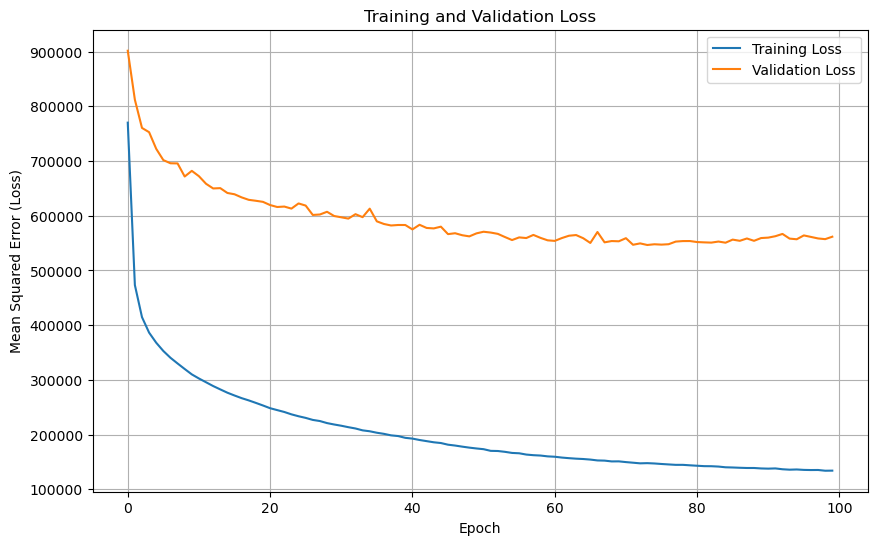

In [21]:
# --- Visualize training history ---
# The 'history' object contains the training and validation loss for each epoch.
# Plotting this helps us see if the model is overfitting.
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error (Loss)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
'''Saving the model'''
# Define the file path for saving the model
model_filepath = 'baseline_model.keras'

# Save the entire model to this file
baseline_model.save(model_filepath)

print(f"Model saved successfully to {model_filepath}")

Model saved successfully to baseline_model.keras


In [11]:
# Define the file path where your model was saved
model_filepath = 'baseline_model.keras'

# Load the model and assign it back to the 'baseline_model' variable
baseline_model = keras.models.load_model(model_filepath)

print("Model loaded successfully!")

# Now you can continue using 'baseline_model' as if you just trained it
# For example, you can check its summary or use it for predictions.
baseline_model.summary()

Model loaded successfully!


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │       570,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,725,509 (6.58 MB)

 Trainable params: 575,169 (2.19 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,150,340 (4.39 MB)

In [12]:
# --- Manually enter the baseline model's best performance ---
# Find this value from the output when you first trained the model.
baseline_min_val_loss = 561755.4375 # <-- REPLACE THIS WITH YOUR ACTUAL VALUE

# Initialize a dictionary to store all results
results = {
    "Baseline (64x2, Adam, ReLU)": baseline_min_val_loss
}

print(f"   - Baseline performance (min validation loss) set to: {results['Baseline (64x2, Adam, ReLU)']:.2f}")

   - Baseline performance (min validation loss) set to: 561755.44


In [ ]:
# --- A flexible function for building models with different hyperparameters ---
def build_model(num_layers, neurons_per_layer, activation_func, optimizer_name, input_shape):
    """Builds a Keras model with specified hyperparameters."""
    model = keras.Sequential()
    model.add(layers.Dense(neurons_per_layer, activation=activation_func, input_shape=input_shape))
    for _ in range(num_layers - 1):
        model.add(layers.Dense(neurons_per_layer, activation=activation_func))
    model.add(layers.Dense(1)) # Output layer
    model.compile(optimizer=optimizer_name, loss='mean_squared_error')
    return model

# --- Define the two new models to train and compare ---
models_to_train = {
    "Wider (128x2, RMSprop, ReLU)": {
        "layers": 2, "neurons": 128, "optimizer": "rmsprop", "activation": "relu"
    },
    "Wider (128x2, Adam, LeakyReLU)": {
        "layers": 2, "neurons": 128, "optimizer": "adam", "activation": "leaky_relu"
    }
}

# --- Loop through, train, and evaluate each new model ---
for name, config in models_to_train.items():
    print(f"\n---Training: {name} ---")
    
    # Build the model based on its configuration
    model = build_model(
        num_layers=config["layers"],
        neurons_per_layer=config["neurons"],
        activation_func=config["activation"],
        optimizer_name=config["optimizer"],
        input_shape=input_shape
    )
    
    # Train it
    history = model.fit(
        X_train_processed, y_train,
        epochs=100,
        validation_split=0.2,
        verbose=1
    )
    
    # Store its best result
    min_val_loss = min(history.history['val_loss'])
    results[name] = min_val_loss
    print(f"   - Finished training. Min validation loss for {name}: {min_val_loss:.2f}")


---Training: Wider (128x2, RMSprop, ReLU) ---
Epoch 1/100
1993/1993 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - loss: 746153.3750 - val_loss: 943873.3125
Epoch 2/100
1993/1993 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - loss: 539277.2500 - val_loss: 925343.9375
Epoch 3/100
1993/1993 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - loss: 507983.8438 - val_loss: 881459.0000
Epoch 4/100
1993/1993 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - loss: 463628.1875 - val_loss: 825544.4375
Epoch 5/100
1993/1993 ━━━━━━━━━━━━━━━━━━━━ 27s 13ms/step - loss: 417687.1562 - val_loss: 776832.0000
Epoch 6/100
1993/1993 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - loss: 387702.7188 - val_loss: 744370.6875
Epoch 7/100
1993/1993 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - loss: 371109.5000 - val_loss: 724117.1250
Epoch 8/100
1993/1993 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - loss: 359176.2812 - val_loss: 716897.6250
Epoch 9/100
1993/1993 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - loss: 348149.6875 - val_loss: 694339.6875
Epoch 10/100
1993/1993 ━━━━━━━━━━━━━━━━━━━━ 21s 

c:\Users\aewee\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
1993/1993 ━━━━━━━━━━━━━━━━━━━━ 23s 11ms/step - loss: 715484.0000 - val_loss: 928559.8125
Epoch 2/100
1993/1993 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - loss: 516553.5625 - val_loss: 892213.6875
Epoch 3/100
1993/1993 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - loss: 492344.1875 - val_loss: 876785.1875
Epoch 4/100
1993/1993 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - loss: 475009.6562 - val_loss: 864277.0625
Epoch 5/100
1993/1993 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - loss: 462904.0312 - val_loss: 876203.6875
Epoch 6/100
1993/1993 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - loss: 452833.0938 - val_loss: 873656.7500
Epoch 7/100
1993/1993 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - loss: 443917.5938 - val_loss: 850705.5625
Epoch 8/100
1993/1993 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - loss: 423628.1562 - val_loss: 813938.5625
Epoch 9/100
1993/1993 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - loss: 396993.1562 - val_loss: 786010.9375
Epoch 10/100
1993/1993 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - loss: 366570.1562 - val_loss: 7

In [14]:
# --- Compare results ---
best_architecture_name = min(results, key=results.get)

print("\n--- Comparison Results ---")
for name, loss in results.items():
    print(f"{name}: Min Validation Loss = {loss:.2f}")

print(f"\nBest architecture is: {best_architecture_name}")



--- Comparison Results ---
Baseline (64x2, Adam, ReLU): Min Validation Loss = 561755.44
Wider (128x2, RMSprop, ReLU): Min Validation Loss = 572974.94
Wider (128x2, Adam, LeakyReLU): Min Validation Loss = 575334.38

Best architecture is: Baseline (64x2, Adam, ReLU)


Performance Evaluation

In [15]:
# --- Make predictions on the test set ---
y_pred = baseline_model.predict(X_test_processed).flatten()

# --- Calculate evaluation metrics ---
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("--- Model Performance on Test Set ---")
print(f"Mean Absolute Error (MAE):     ${mae:,.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Root Mean Squared Error (RMSE):  ${rmse:,.2f}")
print(f"R-squared (R²):                  {r2:.4f}")

623/623 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
--- Model Performance on Test Set ---
Mean Absolute Error (MAE):     $300.75
Mean Absolute Percentage Error (MAPE): 20.93%
Root Mean Squared Error (RMSE):  $561.95
R-squared (R²):                  0.6118


Visualizing the results

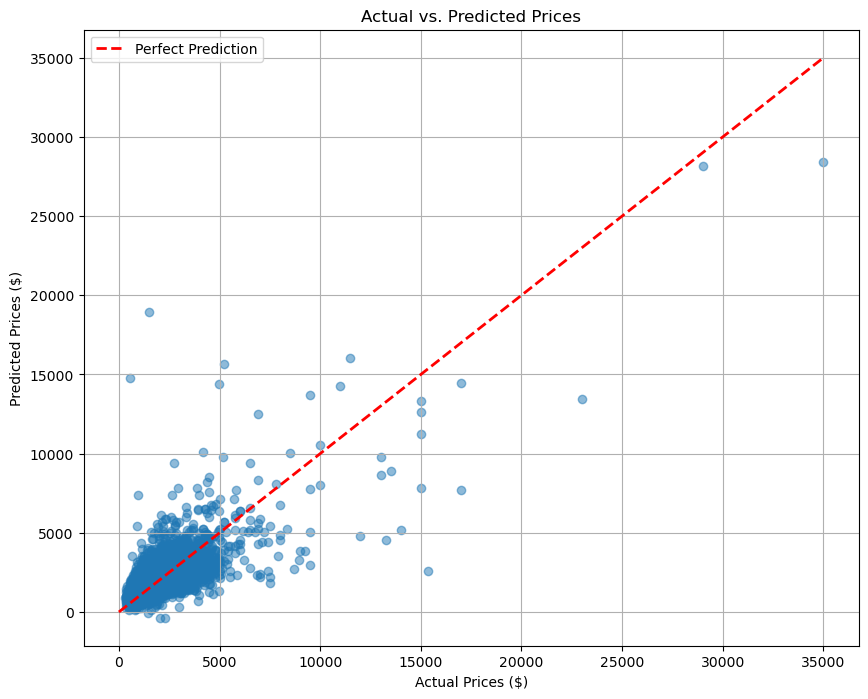

In [16]:
# Create a scatter plot of actual vs. predicted values
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Prices ($)")
plt.ylabel("Predicted Prices ($)")
plt.title("Actual vs. Predicted Prices")

# Add the 45-degree line for reference (perfect predictions)
max_price = max(y_test.max(), y_pred.max())
plt.plot([0, max_price], [0, max_price], color='red', linestyle='--', lw=2, label='Perfect Prediction')

plt.legend()
plt.grid(True)
plt.show()

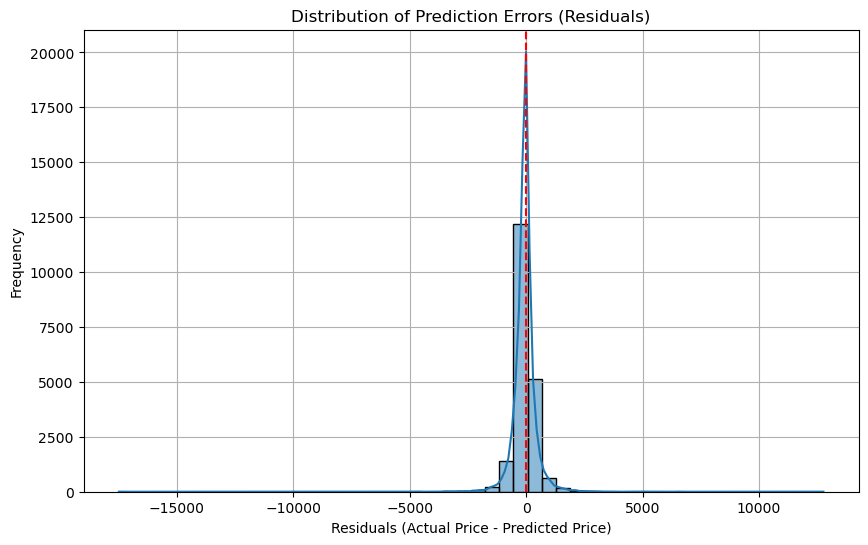

In [17]:
# Calculate the residuals
residuals = y_test - y_pred

# Create a histogram of the residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=50)
plt.xlabel("Residuals (Actual Price - Predicted Price)")
plt.ylabel("Frequency")
plt.title("Distribution of Prediction Errors (Residuals)")
plt.axvline(0, color='red', linestyle='--') # Add a line at zero error
plt.grid(True)
plt.show()